In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files 
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [4]:
dataset=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [5]:
dataset.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
# Renaming Columns

dataset=dataset.rename(columns={'ID#':'ID','Award?':'Award'})

In [7]:
dataset

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
# Dropping ID and Award as they do not make any contribution during clustering.
dataset1=dataset.drop(['ID','Award'],axis=1)

In [9]:
dataset1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [11]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler
std_df=StandardScaler().fit_transform(dataset1)

std_df.shape

(3999, 10)

In [14]:
# MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

minmax_df=MinMaxScaler().fit_transform(dataset1)
minmax_df.shape

(3999, 10)

In [17]:
std_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

# ***Heirarchical Clustering***

In [19]:
# Importing libraries for Heirarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

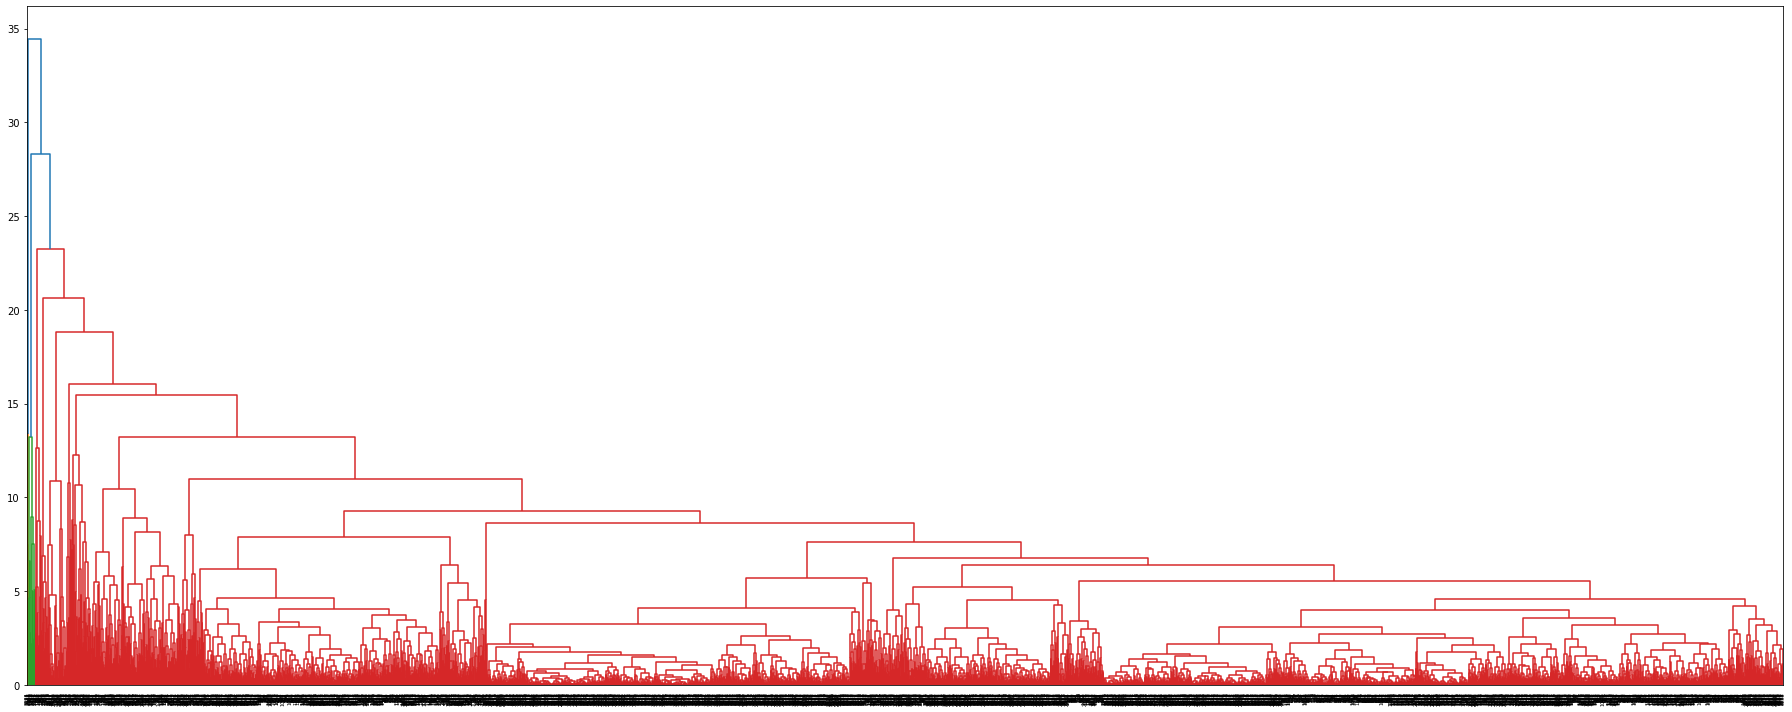

In [20]:
# Dendrogram

plt.figure(figsize=(25,10))
dendrogram=sch.dendrogram(sch.linkage(std_df,method='complete'))
plt.tight_layout()

In [23]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')

In [24]:
hc.fit(std_df)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [25]:
y_hc=hc.fit_predict(std_df)

In [26]:
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
dataset1['H_Cluster_ID']=y_hc

In [28]:
dataset1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,H_Cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [29]:
data1=dataset1.sort_values('H_Cluster_ID')

In [30]:
data1.iloc[:,[-1]]

,H_Cluster_ID
0,0
2656,0
2657,0
2658,0
2659,0
...,...
2283,2
2955,2
3338,2
2364,2


# ***K-Means Clustering***

In [31]:
# Importing libraries for K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

In [33]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  H_Cluster_ID       3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [36]:
X=std_df

In [37]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

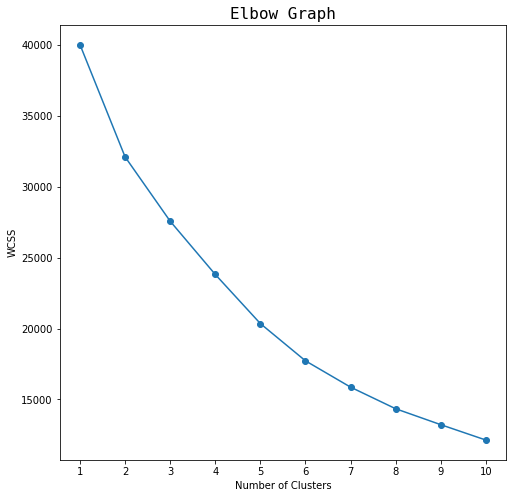

In [41]:
# Plotting the Elbow Graph

wcss=[]

for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,8))
plt.plot(range(1,11),wcss,'o-')
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph',family='monospace',fontsize=16)
plt.show()

# ***Using Heatmap to find Silhouette Score***

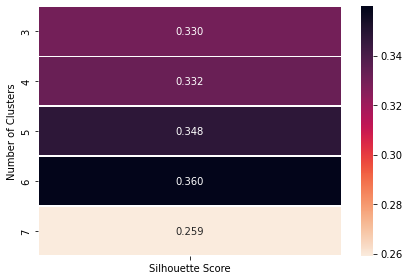

In [45]:
range_n_clusters=[3,4,5,6,7]

results=[]

for n_clusters in range_n_clusters:
  clustered=KMeans(n_clusters=n_clusters,init='k-means++',random_state=10)
  clustered_labels=clustered.fit_predict(X)
  silhouette_avg=silhouette_score(X,clustered_labels)
  results.append([n_clusters,silhouette_avg])

results=pd.DataFrame(results,columns=["Number of Clusters","Silhouette Score"])
pivot_km=pd.pivot_table(results,index="Number of Clusters",values="Silhouette Score")

plt.figure()
sns.heatmap(pivot_km,annot=True,linewidth=0.5,fmt='0.3f',cmap=sns.cm.rocket_r)
plt.tight_layout()

In [46]:
# Now fitting our model so that we get six clusters.

clustered=KMeans(n_clusters=6,init='k-means++',random_state=10)
clustered.fit(X)

KMeans(n_clusters=6, random_state=10)

In [47]:
clustered.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [48]:
clustered.cluster_centers_

array([[ 0.41584979, -0.11786467,  1.17555244, -0.09824189, -0.05505774,
         0.86991501,  0.74002288, -0.09878192, -0.10604227,  0.34353964],
       [-0.30921718, -0.12411669, -0.65037637, -0.09824189, -0.06064369,
        -0.53816933, -0.53080724, -0.17677047, -0.19138143, -0.20253976],
       [ 1.14496321,  0.42713044,  0.15392347, -0.09824189, -0.06276658,
         0.67488211,  1.71957271,  3.80179617,  4.06362975,  0.2760445 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398],
       [ 0.43393737,  6.85291656, -0.01860659, -0.09824189, -0.06276658,
         0.07929303,  0.07322846,  0.36123467,  0.39754351, -0.11803558]])

In [54]:
dataset1['Clusters_ID']=clustered.labels_

In [57]:
dataset1=dataset1.drop(['H_Cluster_ID'],axis=1)
dataset1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Clusters_ID
0,28143,0,1,1,1,174,1,0,0,7000,1
1,19244,0,1,1,1,215,2,0,0,6968,1
2,41354,0,1,1,1,4123,4,0,0,7034,1
3,14776,0,1,1,1,500,1,0,0,6952,1
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,1


In [59]:
dataset1.groupby('Clusters_ID').agg(['mean']).reset_index()

,Clusters_ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,115503.626787,52.938299,3.677953,1.000000,1.001505,38151.508653,18.708051,321.757713,0.971407,4827.926260
1,1,42443.656859,48.101948,1.164111,1.000000,1.000414,4149.161210,6.504766,212.571073,0.647741,3700.339826
2,2,188971.328571,474.528571,2.271429,1.000000,1.000000,33441.864286,28.114286,5782.700000,16.785714,4688.557143
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233
5,5,117326.186441,5445.305085,2.033898,1.000000,1.000000,19059.610169,12.305085,965.796610,2.881356,3874.830508
